# Lab 7 - st121413
## Akraradet Sinsamersuk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fftpack import fft, fftshift
plt.style.use('seaborn-whitegrid')


def calFFT(signal, window = 2048 , shift = False , inDB = False, half = True):
    mag = np.abs(fft(signal, window) / (len(signal)/2.0))
    freq = np.linspace(0, 1, len(mag))

    if shift:
        mag = np.abs(fftshift(mag / abs(mag).max() ) )
        freq = np.linspace(-0.5, 0.5, len(mag))
        
    
    if inDB:
        mag = 20 * np.log10( mag )

    if half:
        mag = mag[:len(mag)//2]
        freq = freq[:len(freq)//2]

    return mag, freq

### 1. Plot Sinc function in time domain and frequency domain


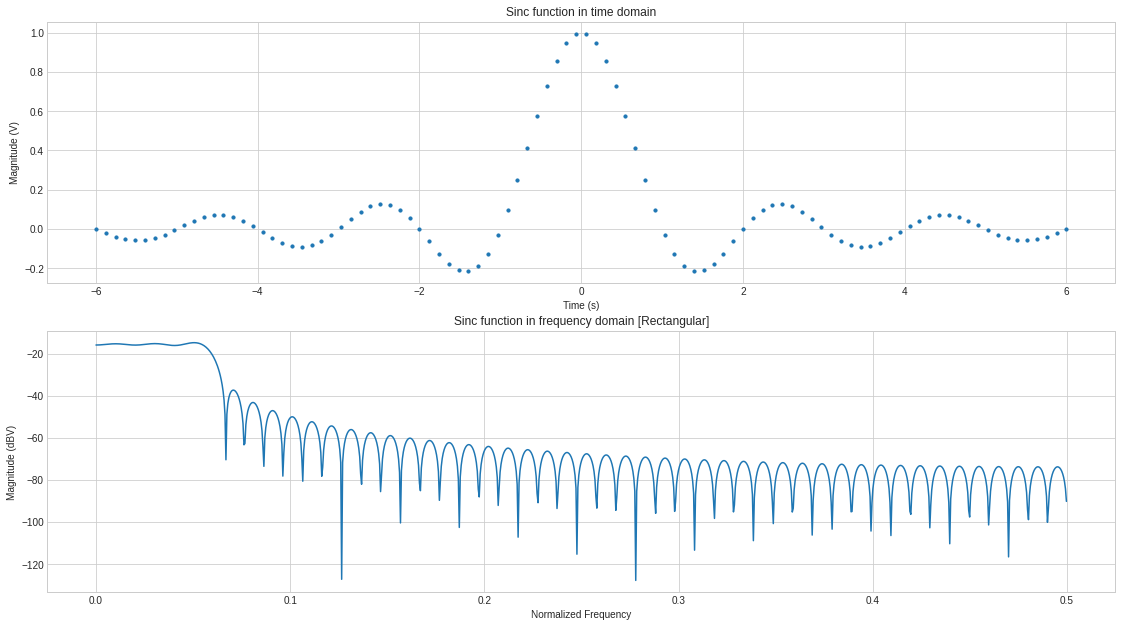

In [2]:
def sinc(t,f):
    temp = t * np.pi * f
    return np.sin(temp) / temp

f = 1
fs = 100
t = np.linspace(-6,6,fs)
ht_sinc = sinc(t,f)
fig,ax = plt.subplots(2,figsize=(16,9))
fig.tight_layout(pad=3.0)
ax[0].scatter(t,ht_sinc, s=10)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title(f"Sinc function in time domain")

HF_sinc, F_range = calFFT(ht_sinc, inDB = True)
ax[1].plot(F_range, HF_sinc)
ax[1].set_xlabel('Normalized Frequency')
ax[1].set_ylabel('Magnitude (dBV)')
ax[1].set_title(f"Sinc function in frequency domain [Rectangular]")

plt.show()

### 2. Plot Raised-Cosine filter in time domain and frequency domain

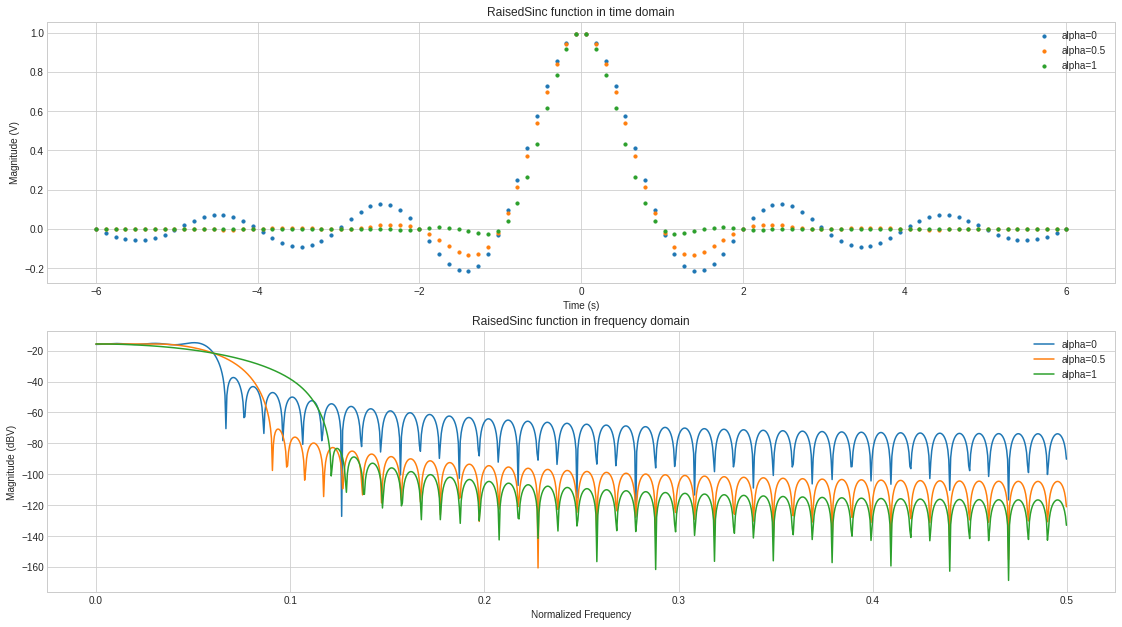

In [3]:
def RaisedSinc(t,f, alpha = 0):
    s = np.sin(t * np.pi * f) / (np.pi*t)
    c = np.cos(t * np.pi * f * alpha) / (1 - (4.0 * alpha * t * f / 2.0 )**2 )
    return s * c
    # temp = f * np.sinc(t) * np.cos(np.pi * alpha * t * f)
    # temp = temp / (1 - (2 * alpha * t * f)**2)
    # return temp 

f = 1
fs = 100
t = np.linspace(-6,6,fs)

fig,ax = plt.subplots(2,figsize=(16,9))
fig.tight_layout(pad=3.0)
for alpha in [0, 0.5,  1]:
    ht_RaisedSinc = RaisedSinc(t,f,alpha)
    ax[0].scatter(t,ht_RaisedSinc, label=f"alpha={alpha}", s=10)

    HF_RaisedSinc, F_range = calFFT(ht_RaisedSinc, inDB = True)
    ax[1].plot(F_range, HF_RaisedSinc, label=f"alpha={alpha}")


ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title(f"RaisedSinc function in time domain")
ax[0].legend()


ax[1].set_xlabel('Normalized Frequency')
ax[1].set_ylabel('Magnitude (dBV)')
ax[1].set_title(f"RaisedSinc function in frequency domain")
ax[1].legend()

plt.show()

### 3. Plot Gaussian Filter in time domain and frequency domain

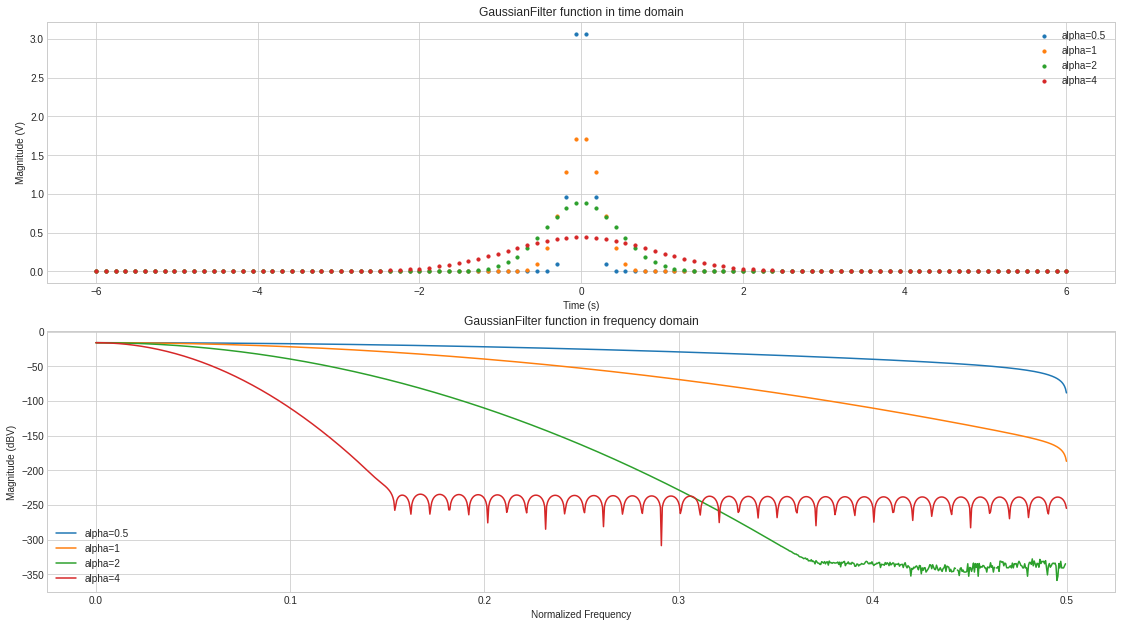

In [4]:
def GaussianFilter(t,f, alpha = 0):
    a = np.pi**0.5 / alpha 
    b = np.exp( -1 * (np.pi * t / alpha)**2  )
    return a * b

f = 1
fs = 100
t = np.linspace(-6,6,fs)

fig,ax = plt.subplots(2,figsize=(16,9))
fig.tight_layout(pad=3.0)
for alpha in [0.5, 1, 2, 4]:
    hauGuassianFilter = GaussianFilter(t,f,alpha)
    ax[0].scatter(t,hauGuassianFilter, label=f"alpha={alpha}", s=10)

    HauGuassianFilter, F_range = calFFT(hauGuassianFilter, inDB = True)
    ax[1].plot(F_range, HauGuassianFilter, label=f"alpha={alpha}")


ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title(f"GaussianFilter function in time domain")
ax[0].legend()


ax[1].set_xlabel('Normalized Frequency')
ax[1].set_ylabel('Magnitude (dBV)')
ax[1].set_title(f"GaussianFilter function in frequency domain")
ax[1].legend()

plt.show()